# Clustering
The goal of this exercise is to get you:
1. familiar with different  clustering methods, what they optimize for etc.
2. thinking about how to assess clustering quality
3. thinking about the number of clusters

In [39]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import (datasets, cluster, mixture,metrics,decomposition)
from scipy import spatial,stats
# Load Digits data
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target

# A bunch of convenience functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Digit')
    plt.xlabel('Cluster')
    #plt.show()
    
def find_cluster_order(confMat):
    n=confMat.shape[0]
    maxSum=0;
    bestP=[]
    for p in itertools.permutations(range(n)):
        s=np.sum(confMat[range(n),p])**2
        if(s>maxSum):
            bestP=p
            maxSum=s
    return bestP

def make_confusion_plot(clusterNums,title):
    confMat=metrics.confusion_matrix(y,clusterNums)
    confMat=confMat[:,find_cluster_order(confMat)]
    plot_confusion_matrix(confMat,range(6),title=title)


pca = decomposition.PCA(n_components=2)
pca.fit(X)
outCoords=pca.transform(X)
   
x_min, x_max = np.min(outCoords, 0), np.max(outCoords, 0)
outCoordsScaled = (outCoords - x_min) / (x_max - x_min)   

def remap(trueClust,assignedClust):
     order=find_cluster_order(metrics.confusion_matrix(trueClust[assignedClust>=0],assignedClust[assignedClust>=0]))
     clusterNumsMapped=np.zeros((len(order),))
     
     for counter,val in enumerate(order):
        clusterNumsMapped[val]=counter   
     
     result=-1*np.ones((len(assignedClust),))
     result[assignedClust>=0]=clusterNumsMapped[assignedClust[assignedClust>=0]]       
     return  result
   
def make_pca_plot(labels):    
    p=find_cluster_order(metrics.confusion_matrix(y[labels>=0],labels[labels>=0]))
    remap=np.zeros((len(p),))
     
    for counter,val in enumerate(p):
        remap[val]=counter
    for i in range(X.shape[0]):
        if(labels[i]>=0):
            plt.text(outCoordsScaled[i, 0], outCoordsScaled[i, 1], str(y[i]),
                color=plt.cm.tab20(remap[labels[i]] / 10.),fontdict={'weight': 'bold', 'size': 12})
        else:
            plt.text(outCoordsScaled[i, 0], outCoordsScaled[i, 1], str(y[i]),
                color='gray',fontdict={'weight': 'bold', 'size': 12})
    
    #plt.show()    
    
def make_plots(data,trueClusterNums):
    fig=plt.figure(figsize=(20,10))

    ax=fig.add_subplot(2,3,1)
    plt.scatter(data[:,0],data[:,1],50,trueClusterNums)
    plt.title('True Clusters')
    plt.axis('square')


    ax=fig.add_subplot(2,3,2)
    assignedClusterNums=cluster.KMeans(n_clusters=4).fit_predict(data)
    plt.scatter(data[:,0],data[:,1],50,remap(trueClusterNums,assignedClusterNums))
    plt.title('Kmeans Clusters')
    plt.axis('square')


    ax=fig.add_subplot(2,3,3)
    gmm=mixture.GaussianMixture(n_components=4).fit(data)
    assignedClusterNums=gmm.predict(data)
    plt.scatter(data[:,0],data[:,1],50,remap(trueClusterNums,assignedClusterNums))
    plt.title('GMM Clusters')
    plt.axis('square')


    ax=fig.add_subplot(2,3,4)
    assignedClusterNums=cluster.AgglomerativeClustering(n_clusters=4,linkage='ward').fit_predict(data)
    plt.scatter(data[:,0],data[:,1],50,remap(trueClusterNums,assignedClusterNums))
    plt.title('Agg:Ward')
    plt.axis('square')


    ax=fig.add_subplot(2,3,5)
    assignedClusterNums=cluster.AgglomerativeClustering(n_clusters=4,linkage='average').fit_predict(data)
    plt.scatter(data[:,0],data[:,1],50,remap(trueClusterNums,assignedClusterNums))
    plt.title('Agg:Average')
    plt.axis('square')


    ax=fig.add_subplot(2,3,6)
    assignedClusterNums=cluster.AgglomerativeClustering(n_clusters=4,linkage='complete').fit_predict(data)
    plt.scatter(data[:,0],data[:,1],50,remap(trueClusterNums,assignedClusterNums))
    plt.title('Agg:Complete')
    plt.axis('square')
    plt.show()


To help build intuition we will work with the digits data setthat you should be pretty familiar with by now. We apply several clustering methods to it, and also visualize the clustering on the PCA plot from the previous lecture

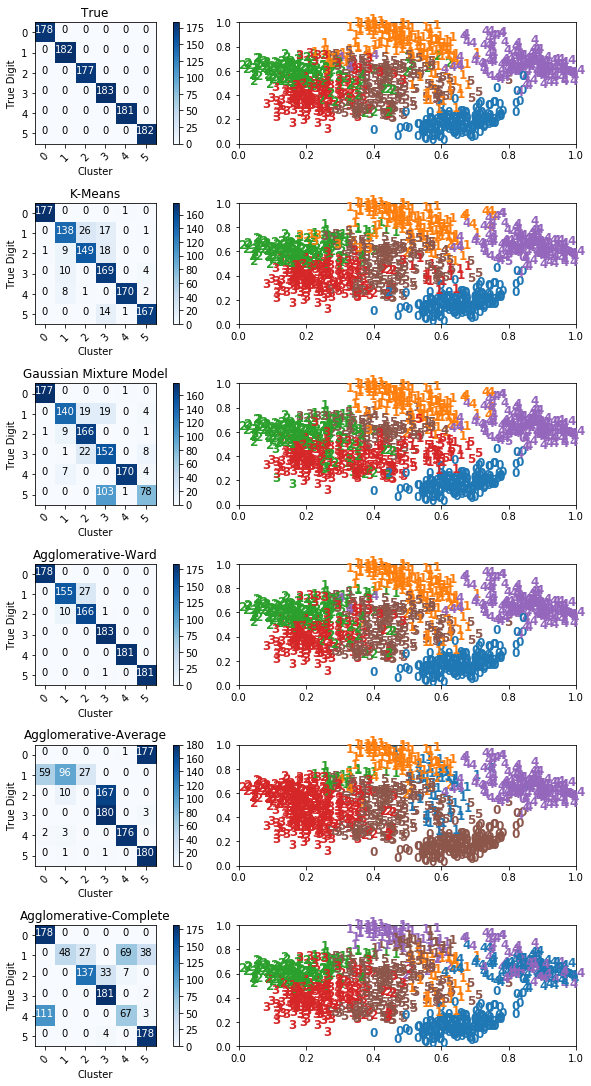

In [18]:
fig=plt.figure(figsize=(10,15))

ax=fig.add_subplot(6,2,1)
make_confusion_plot(y,'True')

ax=fig.add_subplot(6,2,2)
make_pca_plot(y)

ax=fig.add_subplot(6,2,3)
clusterNums_kmeans=cluster.KMeans(n_clusters=6).fit_predict(X)
make_confusion_plot(clusterNums_kmeans,'K-Means')

ax=fig.add_subplot(6,2,4)
make_pca_plot(clusterNums_kmeans)

ax=fig.add_subplot(6,2,5)
gmm=mixture.GaussianMixture(n_components=6).fit(X)
clusterNums_gmm=gmm.predict(X)
make_confusion_plot(clusterNums_gmm,'Gaussian Mixture Model')

ax=fig.add_subplot(6,2,6)
make_pca_plot(clusterNums_gmm)

ax=fig.add_subplot(6,2,7)
clusterNums_ward=cluster.AgglomerativeClustering(n_clusters=6,linkage='ward').fit_predict(X)
make_confusion_plot(clusterNums_ward,'Agglomerative-Ward')

ax=fig.add_subplot(6,2,8)
make_pca_plot(clusterNums_ward)

ax=fig.add_subplot(6,2,9)
clusterNums_avglink=cluster.AgglomerativeClustering(n_clusters=6,linkage='average').fit_predict(X)
make_confusion_plot(clusterNums_avglink,'Agglomerative-Average')

ax=fig.add_subplot(6,2,10)
make_pca_plot(clusterNums_avglink)

ax=fig.add_subplot(6,2,11)
clusterNums_completelink=cluster.AgglomerativeClustering(n_clusters=6,linkage='complete').fit_predict(X)
make_confusion_plot(clusterNums_completelink,'Agglomerative-Complete')

ax=fig.add_subplot(6,2,12)
make_pca_plot(clusterNums_completelink)

plt.show()

## Clustering Quality

### Measured against "ground truth" labels
Unsupervised methods like clustering do not have access to the ground truth labels. So while they tell us which clusters points belong to, the clusters may not correspond to the ground truth at all. Thus, in the confusion matrix above we have ground truth (y-axis), but the cluster numbers (x-axis) were re-ordered after the fact to resemble a diagonal matrix. How do we summarize the results of something like this matrix?

There are several approaches to quantify the goodness of clustering when we have the ground truth label (http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

***Question:*** Under what situations would one want to perform unsupervised (as opposed to supervised) clustering when we have access to the group labels? Why are we still measuring agreement with these group labels when we chose not to use them?

Measures like the mutual information and the rand index, essentially measure how tightly clusters match with known labels (compared to a random assignment). 
Ground truth based clustering quality approaches 
* Pros: are they don't make assumptions on what defined a good cluster (e.g tight as prefered by k-mean or connected as prefered by DBSCAN).
* Cons: Ground truth is typically not available, and labels we have may not represent true structure of the data

To gain more insights in what way clustering is working (or not) it is useful to see if clusters group things together that should be apart, group things apart that should be together. See the plot below to the right. 
**** Question**** What does this say about the average linkage result?

### Measured without ground truth labels
In this case cluster quality is measured agains our notion of what is a good cluster. The silhouette index is a common example. 
* Pros: no ground truth laabel needed, tell us how grouped (as opposed to uniformly distributed) our clusters are.
* Cons: Depends on a pre-defined notion of what contitutes good clustering. This typically is tight clusters, and will penalize methods such as DBSCAN that look for connected clusters.

The plot on the right below compares the results of these two kinds of clustering quality measures.

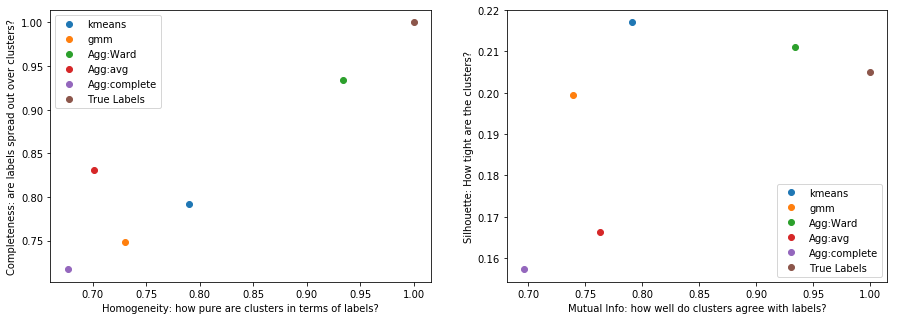

In [38]:
clusterRes=((clusterNums_kmeans,'kmeans'),(clusterNums_gmm,'gmm'),
             (clusterNums_ward,'Agg:Ward'), (clusterNums_avglink,'Agg:avg'),
             (clusterNums_completelink,'Agg:complete'),
             (y,'True Labels'))

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1,2,1)
for counter,res in enumerate(clusterRes):
    homogeneity=metrics.homogeneity_score(y, res[0])
    completeness=metrics.completeness_score(y, res[0])
    plt.plot(homogeneity,completeness,'o',label=res[1])

plt.legend()   
plt.xlabel('Homogeneity: how pure are clusters in terms of labels?')
plt.ylabel('Completeness: are labels spread out over clusters?')

ax=fig.add_subplot(1,2,2)
for counter,res in enumerate(clusterRes):
    mutualInf=metrics.normalized_mutual_info_score(y, res[0])
    silhouette=metrics.silhouette_score(X, res[0])
    plt.plot(mutualInf,silhouette,'o',label=res[1])

plt.legend()   
plt.xlabel('Mutual Info: how well do clusters agree with labels?')
plt.ylabel('Silhouette: How tight are the clusters?')
plt.show() 


****Questions:**** Interpret the plot on the right
1. What does it mean that k-means & Ward are above the true labels? Is this suprising?
2. How is k-means higher than GMM? Isn't k-means GMM with constraints?
3. What would it mean if the Silhoutte and Mutual information were strongly correlated or if they were completely uncorrelated?

If you go back and run the clusterings a few times, you'll notice that the stochastic ones like the results for the GMM and k-means vary a fair amount. Do you think this is because:
1. The results get stuck in different local minima because of imperfect optimization
2. OR there are many different configurations with the same error

One way to get a hint of this is check if the agreement with true labels matches goodness of fit. See plot below. What does this tell you?

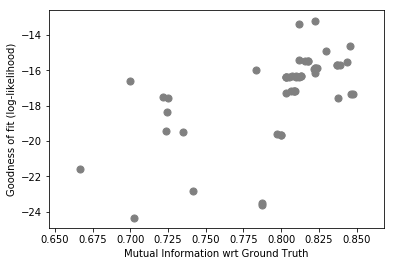

In [8]:
numberOfRandomization=50
mutInf=np.zeros((numberOfRandomization,))
logLikelihood=np.zeros((numberOfRandomization,))

for r in range(numberOfRandomization):
    gmm=mixture.GaussianMixture(n_components=6).fit(X)
    clusterNums=gmm.predict(X)
    mutInf[r]=metrics.normalized_mutual_info_score(y,clusterNums)
    logLikelihood[r]=gmm.score(X)
   
    
plt.scatter(mutInf,logLikelihood,50,'gray')

plt.xlabel('Mutual Information wrt Ground Truth')
plt.ylabel('Goodness of fit (log-likelihood)')
plt.legend()
plt.show()

## DBSCAN
The thing that makes DBSCAN different is that we don't provide it the number of clusters. Instead we need to provide a "close" distance and the number of neighbors within that distnce to define core points. If we have an intrinsic understanding of the distance in our measurements and the density of points, this works well. But is 20 near or far for the digits data? How many points will be within this distance? For a new data set we will not have such intuition.

To get some inutiotion for this lets pick a "control" digit cllas, say 0. To get an idea of what is a good cutoff distance, lets look at how far points within 0 are typically from one another (smaller cutoff than this and we wont have any neighbors) and how far 0 digits are from the others (distance greater than this are too far). How about the number of neighbors within a cutoff. One can look at a plot of how many 0 digits have greater than x other 0 digits, within a distance y.

Look at these plots below. What do they tell you? What would be a reasonable ballpark for the cutoff? Try changing the clasnum to something else. Do the distance distributions change?

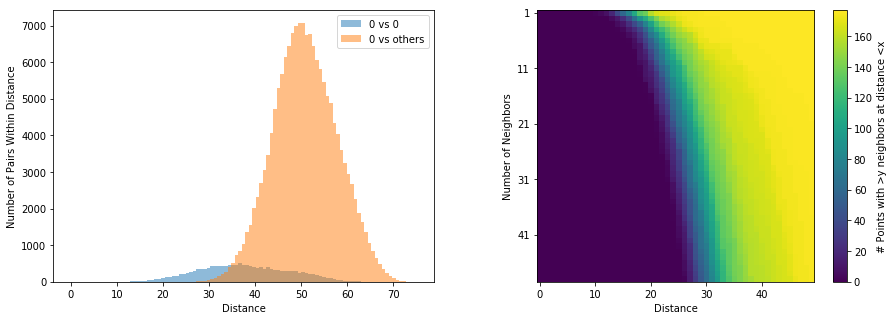

In [240]:
classNum=2

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1,2,1)
withinClassDist=spatial.distance.pdist(X[y==classNum])
acrossClassDist=spatial.distance.cdist(X[y==classNum],X[y!=classNum])
bins = np.linspace(0, 75, 100)
plt.hist(withinClassDist, bins, alpha=0.5, label='0 vs 0')
plt.hist(acrossClassDist.flatten(), bins, alpha=0.5, label='0 vs others')
plt.legend(loc='upper right')
plt.xlabel('Distance')
plt.ylabel('Number of Pairs Within Distance')
#plt.show()

ax=fig.add_subplot(1,2,2)
fullDists=spatial.distance.squareform(withinClassDist)
distRange=np.array(range(50))
nnVsDist=np.zeros((fullDists.shape[0],len(distRange)))
for i,dist in enumerate(distRange):
    nnVsDist[:,i]=np.sum(fullDists<=dist,axis=1)

nnRange=np.array(range(1,50))
epsVsNN=np.zeros((len(nnRange),len(distRange)))
for i,nn in enumerate(nnRange):
    epsVsNN[i,:]=np.sum(nnVsDist>nn,axis=0)
    
plt.imshow(epsVsNN)
cbar=plt.colorbar()
cbar.set_label('# Points with >y neighbors at distance <x')
tickPos=[0,10,20,30,40]
plt.xticks(tickPos,distRange[tickPos])
plt.yticks(tickPos,nnRange[tickPos])
plt.xlabel('Distance')
plt.ylabel('Number of Neighbors')
plt.show()

Below I've performed dbscan with resonable set of parameters. Can you start seeing why these might be reasonable?

In the plot below, gray points are the co clled noisy points that don't belong to a cluster. Try jumping around a little to understand the behavior.


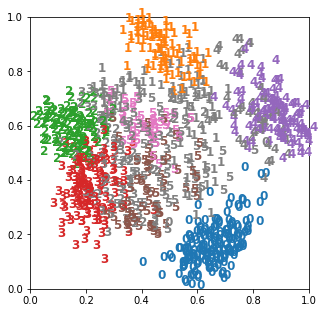

In [244]:
eps=25
min_samples=30

fig=plt.figure(figsize=(5,5))
clusterNums=cluster.DBSCAN(eps=eps,min_samples=min_samples).fit_predict(X)
make_pca_plot(clusterNums)
plt.show()

## Understanding Through Forgery
A great way to understand how a method works is learning how to trick it! Here, I provide you with a basic function to generate 4 spherical clusters which gives good clustering for all methods. Your job is to modify the function in specific ways to cause the different methods to fail. Note: I've generated the data as a mixture of gaussian. 

Suggestions for things to modify include:
1. Start with changing the covariance matrix in different ways and the locations of the centroids
2. The fraction of points in the different clusters
3. Maybe push the result of this function through your own non-linear function (e.g. sin(x), exp(x)). Any warping of the shape should preserve the cluster structure, while altering the cluster shapes.
4. More advanced users should replace the multivariate normal with something else to see how a GMM performs when distributions aren't quite normal. The real hackers will of course just write their own functions.

Get creative!

I'd also suggest running the same function a couple of times to get a sense of the stability of different algorithms.

You might want to create a few copies (with different names) of this function to enable comparison.

In [246]:
def data_generator_simple(numberOfPoints):
    
    # I've set the number of clusters to be 4, to keep things simple
    fracPointsInClusters=np.array([0.25,0.25,0.25,0.25]) # this is the fraction of points assigned to the different clusters. Makes sure this adds up to one
    clusterCenters=np.array([[0,0],[1,0],[0,1],[1,1]]) # These are the centers of the 4 clusters. They are currently at the edge of a square
    clusterCovariances=(np.array([[0.025,0],[0,0.025]]),  # Each row is the covariance matrix for a guassian. 
                       np.array([[0.025,0],[0,0.025]]), # Since they are identical the clusters will be identical
                       np.array([[0.025,0],[0,0.025]]), # Changing these values can take the gaussian from a circle to differnt ellipse shapes
                       np.array([[0.025,0],[0,0.025]])) # Keep the matrices symmetric though
    data=np.zeros((numberOfPoints,2))
    clusterNums=np.random.choice(range(4), size = numberOfPoints, p = fracPointsInClusters)
    
    for n in range(numberOfPoints):
        data[n,:]=np.random.multivariate_normal(clusterCenters[clusterNums[n],:],
                                                clusterCovariances[clusterNums[n]], 1) # This is where the data is generated. You can 

    return data,clusterNums    


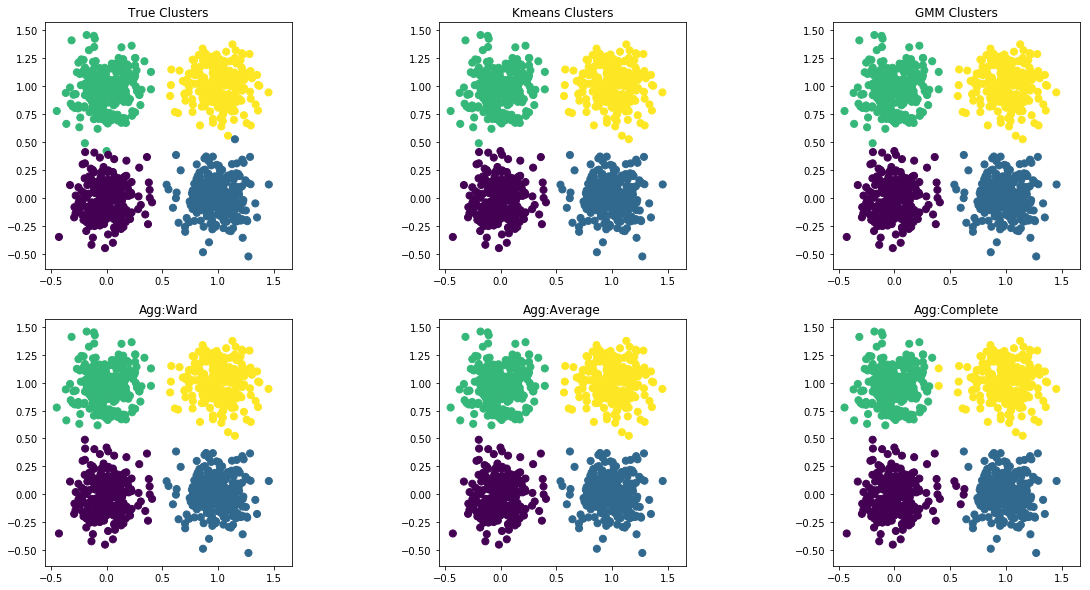

In [262]:
data,trueClusterNums=data_generator_simple(1000)

make_plots(data,trueClusterNums)



Lets try and perform the same exercise on DBSCAN. As before, we don't get to pick the number of clusters, but instead a distance scale, number of neighbors cutoff. Start with the simple case I constructed and build some intuition, then see how things change for your crazy clusters.

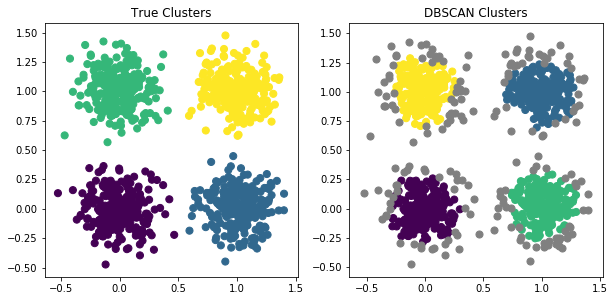

In [280]:
data,trueClusterNums=data_generator_simple(1000)

eps=0.1
min_samples=20

fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],50,trueClusterNums)
plt.title('True Clusters')
plt.axis('square')

ax=fig.add_subplot(1,2,2)
assignedClusterNums=cluster.DBSCAN(eps=eps,min_samples=min_samples).fit_predict(data)
plt.scatter(data[assignedClusterNums>=0,0],data[assignedClusterNums>=0,1],50,assignedClusterNums[assignedClusterNums>=0])
plt.scatter(data[assignedClusterNums<0,0],data[assignedClusterNums<0,1],50,'gray')
plt.title('DBSCAN Clusters')
plt.axis('square')

plt.show()

## Number of Clusters
A popular method for determining the number of clusters are the AIC/BIC. So lets take one of the data sets you created above and run GMMs with different number of clusters. Where do you expect to see a minimum? How much does this change as your data becomes less GMM like (i.e. don't just use the simple function I gave you)?

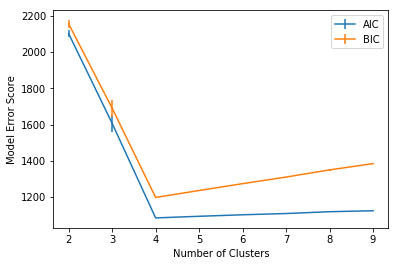

In [295]:
data,trueClusterNums=data_generator_simple(1000)

numberOfRandomization=10
nClustRange=range(2,10)
aic=np.zeros((len(nClustRange),numberOfRandomization))
bic=np.zeros((len(nClustRange),numberOfRandomization))

for n,nClust in enumerate(nClustRange):
    for r in range(numberOfRandomization):
        gmm=mixture.GaussianMixture(n_components=nClust).fit(data)
        aic[n,r]=gmm.aic(data)
        bic[n,r]=gmm.bic(data)
    
plt.errorbar(nClustRange,np.mean(aic,axis=1),np.std(aic,axis=1),label='AIC')
plt.errorbar(nClustRange,np.mean(bic,axis=1),np.std(bic,axis=1),label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Model Error Score')
plt.legend()
plt.show()

Finally, lets finish up and motivate the magic of proababilitic variational methods, lets wrap up wtih the bayesian gmm. This method takes a bayesian approach to pick the gmm with the best number of clusters.

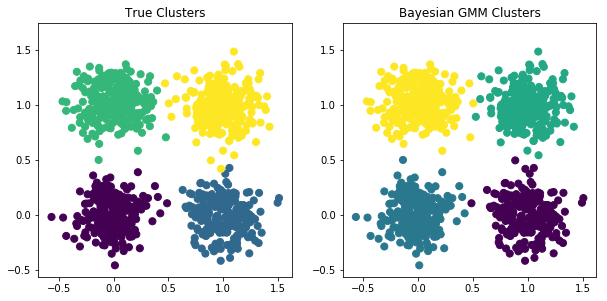

In [304]:
data,trueClusterNums=data_generator_simple(1000)


fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],50,trueClusterNums)
plt.title('True Clusters')
plt.axis('square')

ax=fig.add_subplot(1,2,2)
dpgmm = mixture.BayesianGaussianMixture(n_components=8).fit(data)
assignedClusterNums=dpgmm.predict(data)
plt.scatter(data[:,0],data[:,1],50,assignedClusterNums)
plt.title('Bayesian GMM Clusters')
plt.axis('square')

plt.show()